In [1]:
# You should only need these 3 imports to complete this assignment
import pandas as pd
import numpy as np
from plotnine import *


# 0. Together

## 0.1 Entropy

Entropy is a measure of disorder/chaos. We want ordered and organized data in the leaf nodes of our decision trees. So we want LOW entropy. **Entropy** is defined as:

$$ E = -\sum_1^N p_i* log_2(p_i) $$

Where $N$ is the number of categories or labels in our outcome variable.

This is compared to **gini impurity** which is:

$$GI = 1 - \sum_1^N p_i^2$$

(if you're super into decision trees, check out this paper [Theoretical comparison between the Gini Index and
Information Gain criteria](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf))

### *Question*

WHY do we want the leaf nodes of our tree to be ordered (have low entropy or impurity?)?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />


### Answer

## 0.2 Measures of Chaos for a Split

When you split a node, we now have two new nodes. In order to calculate the chaos (entropy or gini impurity) of the split, we have to calculate the chaos (entropy or gini impurity) for EACH of the new nodes and then calculate the weighted average chaos (entropy or gini impurity).  

The reason we weight each node differently in this calculation, is because if a node has more data in it, than it has more impact, and therefore its measure of chaos (entropy or gini impurity) should count more.

In general, once you've calculated the chaos (entropy or gini impurity) for each of the new nodes, you'll use this formula to calculate the weighted average:


$$ WC = (\frac{N_L}{Total}* C_L) + (\frac{N_R}{Total}* C_R)$$

Where $N_L$ is the number of data points in the Left Node, $N_R$ is the number of data points in the Right Node, and $Total$ is the total number of data points in that split. $C_R$ and $C_L$ are the chaos measure (entropy of gini impurity) for the right and left nodes, respectively.



# 1. Measures of Chaos

## 1.1 Gini Impurity

Use python and numpy to write two functions, as described in the comments below.
<img src = "https://drive.google.com/uc?id=1MQEeJDxxcV8zmhzBgaDZ2QY0Ng8z8hz8" width = 300px/>

In [2]:
### YOUR CODE HERE ############


def gini(inGroup, notGroup):
    # this function calculates the gini impurity for ONE node (left, right, or root!)
    # this function should take in the right and left node counts as arguments
    # and calculate the gini impurity for that node based on the formula above
    # return the impurity for the node.
    
    total = inGroup + notGroup
    
    return 1 - ((inGroup/total) ** 2) - ((notGroup/total) ** 2)

def gini_split(LNP, LNN, RNP, RNN):
    
    # this function takes FOUR arguments: LNP, LNN, RNP, and RNN and calculates
    # the gini impurity for each node (by calling gini()) and then calculates
    # the weighted average of the impurity in each node.
    # return the impurity for the split.
    
    totalL = LNP + LNN
    totalR = RNP + RNN
    
    total = totalL + totalR
    
    giniL = gini(LNP, LNN)
    giniR = gini(RNP, RNN)
    return ((totalL/total) * giniL) + ((totalR/total) * giniR)

### YOUR CODE HERE ###############

In [3]:
# use this to test your code, if it prints True, you got the right answer

abs(gini_split(10,5,2,12) - 0.3481116584564861) <= 0.0001

True

## 1.2 Entropy

Use python and numpy to write two functions, as described by the comments below. If you want to read more about entropy, see this [article](https://bricaud.github.io/personal-blog/entropy-in-decision-trees/).

hint: `np.log2()`

In [4]:
### YOUR CODE HERE ###############

def entropy(inGroup, notGroup):
    # this function calculates the entropy for ONE node (left, right, or root!)
    # this function should take in the right and left node counts as arguments
    # and calculate the entropy for that node based on the formula above
    
    total = inGroup + notGroup
    
    return  0 - ((inGroup/total) * np.log2(inGroup/total)) - ((notGroup/total) * np.log2(notGroup/total))

def entropy_split(LNP, LNN, RNP, RNN):
    # this function takes FOUR arguments: LNP, LNN, RNP, and RNN and calculates
    # the entropy for each node (by calling entropy()) and then calculates
    # the weighted average of the entropy in each node.
    # return the entropy for the split.
    
    totalL = LNP + LNN
    totalR = RNP + RNN
    
    total = totalL + totalR
    
    entropyL = entropy(LNP, LNN)
    entropyR = entropy(RNP, RNN)
    
    return ((totalL/total) * entropyL) + ((totalR/total) * entropyR)

### YOUR CODE HERE ###############

In [5]:
# use this to test your code, if it prints True, you got the right answer

abs(entropy_split(10,5,2,12) - 0.7606157383093077) <= 0.0001

True

# 2. Build a Categorical Decision Tree

In [6]:
# Load Mushroom Data------------------------------------
import pandas as pd

# see this site for what variables mean: http://archive.ics.uci.edu/ml/datasets/Mushroom
mush = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")

mush.columns = ['poison','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
                'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type',
                'spore-print-color', 'population', 'habitat']

mush.head()

,poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


For your sanity, let's restrict our dataset to 3 predictor variables...

In [7]:
mush_small = mush[["poison", "bruises", "gill-size"]]

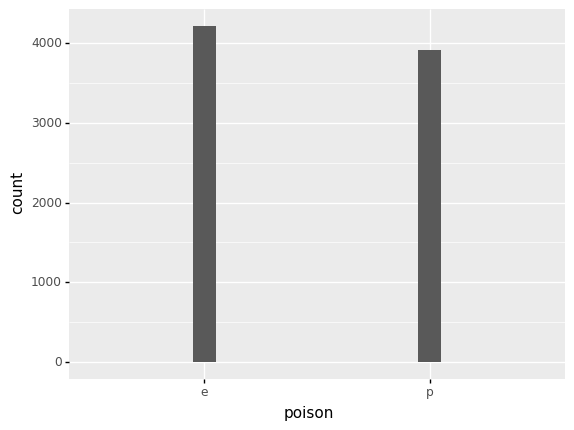

<ggplot: (148979797655)>

In [8]:
# make a bar plot of edible/poisonous mushrooms############
(ggplot(mush, aes("poison")) + geom_histogram())

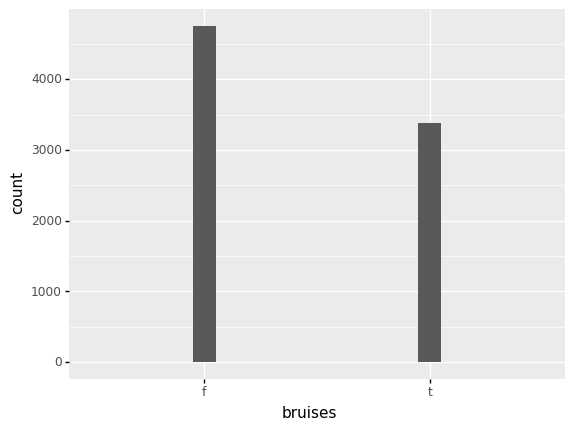

<ggplot: (148980129217)>

In [9]:
# make a bar plot of bruised/not-bruised mushrooms############
(ggplot(mush, aes("bruises")) + geom_histogram())

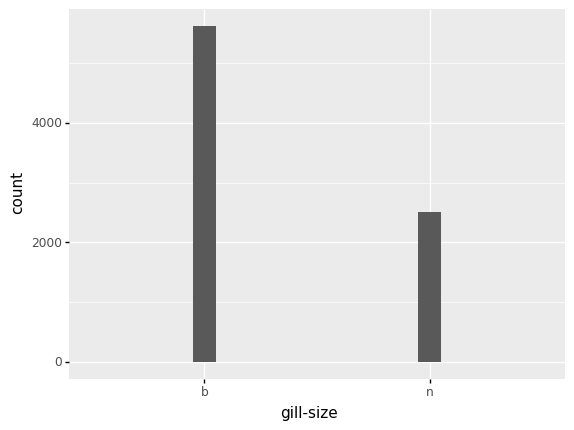

<ggplot: (148980213432)>

In [10]:
# make a bar plot of broad/narrow gilled mushrooms############
(ggplot(mush, aes("gill-size")) + geom_histogram())

## 2.1 Build!

Use the functions you built earlier to build a decision tree that classifies each data point as either edible (`e`) or poisonous (`p`). You can choose to either use entropy or gini impurity. 

### 2.1.1 Layer 1

Choose which variable to use to split the first layer

In [11]:
# create dictionaries of possible splits############
# Try getting something like this for the root node: {'e': 4208, 'p': 3915}
# BUT CALCULATE IT FROM THE DATA, DON'T JUST HARDCODE THAT DICTIONARY

isEdible = mush['poison'] == "e"
isPoison = mush['poison'] == "p"

mushEdible = mush.loc[isEdible]
mushPoison = mush.loc[isPoison]

root = {'e':len(mushEdible.index), 'p':len(mushPoison.index)}

print(root)

# Something like this for splitting on bruise: 
# {'f': {'e': 4748, 'p': 3292}, 't': {'e': 3375, 'p': 623}}
# BUT CALCULATE IT FROM THE DATA, DON'T JUST HARDCODE THAT DICTIONARY

isBruisedE = mushEdible['bruises'] == "t"
isBruisedP = mushPoison['bruises'] == "t"

mushIsBruisedE = mushEdible.loc[isBruisedE]
mushIsBruisedP = mushPoison.loc[isBruisedP]

noBruisedE = mushEdible['bruises'] == "f"
noBruisedP = mushPoison['bruises'] == "f"

mushNoBruisedE = mushEdible.loc[noBruisedE]
mushNoBruisedP = mushPoison.loc[noBruisedP]

split1_1 = {'f': {'e':len(mushNoBruisedE.index), 'p':len(mushNoBruisedP.index)}, 
            't' :{'e':len(mushIsBruisedE.index), 'p':len(mushIsBruisedP.index)}}

print(split1_1)

# Something like this for splitting on gill: 
# {'b': {'e': 5612, 'p': 1692}, 'n': {'e': 2511, 'p': 2223}}
# BUT CALCULATE IT FROM THE DATA, DON'T JUST HARDCODE THAT DICTIONARY

isBroadE = mushEdible['gill-size'] == "b"
isBroadP = mushPoison['gill-size'] == "b"

mushIsBroadE = mushEdible.loc[isBroadE]
mushIsBroadP = mushPoison.loc[isBroadP]

isNarrowE = mushEdible['gill-size'] == "n"
isNarrowP = mushPoison['gill-size'] == "n"

mushIsNarrowE = mushEdible.loc[isNarrowE]
mushIsNarrowP = mushPoison.loc[isNarrowP]

split1_2 = {'b': {'e':len(mushIsBroadE.index), 'p':len(mushIsBroadP.index)}, 
            'n' :{'e':len(mushIsNarrowE.index), 'p':len(mushIsNarrowP.index)}}

print(split1_2)



{'e': 4208, 'p': 3915}
{'f': {'e': 1456, 'p': 3292}, 't': {'e': 2752, 'p': 623}}
{'b': {'e': 3920, 'p': 1692}, 'n': {'e': 288, 'p': 2223}}


In [12]:
# calculate impurity/entropy of each possible split using your functions###########

giniBruises = gini_split(LNP=split1_1['t']['p'], LNN=split1_1['t']['e'], RNP=split1_1['f']['p'], RNN=split1_1['f']['e'])
giniGill = gini_split(LNP=split1_2['b']['p'], LNN=split1_2['b']['e'], RNP=split1_2['n']['p'], RNN=split1_2['n']['e'])

print(giniBruises)
print(giniGill)

0.37363252569361594
0.35376958485233295


# choose which split improves prediction most############

### The split on gill size improves the prediction the most.

### *Question*

Does splitting the root node improve the tree? How can you tell?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### Answer


### 2.1.2 Create Classifications

Pretend that this decision stump (a decision tree with only one layer) is your final tree. Generate the classification for each data point and store it in `mush_small`.

In [18]:
# classification############

mush["predict"] = ['e' if x == 'b' else 'p' for x in mush['gill-size']]

mush['predict'].head()

0    e
1    e
2    p
3    e
4    e
Name: predict, dtype: object

### 2.1.3 Calculate Accuracy

Count how often your model made the correct classification. How well did your model do?

In [19]:
# accuracy############

print(np.mean(mush['predict'] == mush['poison']))

0.7562476917395051


# 3. Chaos

### *Question*

When would Gini Impurity be 0? When would Entropy be 0? What does that mean about our tree/node?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### Answer

Gini impurity and Entropy of a node would both be zero if the decision is 100% accurate. If a tree has zero gini and entropy, that means the accuracy of the whole tree is perfect.